In [ ]:
!pip install matplotlib==3.7.1 seaborn==0.12.2 plotly==5.14.1 altair==5.0.1 bokeh==3.1.1 folium==0.14.0

# Data

In [13]:
import pandas as pd

new_profile = pd.read_csv(
    "https://gist.githubusercontent.com/khuyentran1401/98658198f0ef0cb12abb34b4f2361fd8/raw/ece16eb32e1b41f5f20c894fb72a4c198e86a5ea/github_users.csv"
)


user_name                  name    type_user   
0           josephmisiti         Joseph Misiti        Owner  \
1                   wepe                 wepon        Owner   
2                ZuzooVn                Nam Vu        Owner   
3                  rasbt     Sebastian Raschka        Owner   
4         lazyprogrammer     LazyProgrammer.me        Owner   
...                  ...                   ...          ...   
1201           rdingwall      Richard Dingwall  Contributor   
1202  SumanthReddyKaliki  Sumanth Reddy Kaliki  Contributor   
1203              fperez        Fernando Perez  Contributor   
1204         adityahiran                ADITYA  Contributor   
1205              sun254         Yuanliang Sun  Contributor   

                                   html_url   
0           https://github.com/josephmisiti  \
1                   https://github.com/wepe   
2                https://github.com/ZuzooVn   
3                  https://github.com/rasbt   
4         https://github.com/lazyprogrammer   
...                                     ...   
1201           https://github.com/rdingwall   
1202  https://github.com/SumanthReddyKaliki   
1203              https://github.com/fperez   
1204         https://github.com/adityahiran   
1205              https://github.com/sun254   

                                                    bio   
0           Mathematician & Co-founder of Math & Pencil  \
1                                                   NaN   
2     A Vietnamese Software Engineer who is really p...   
3     Machine Learning researcher & open source cont...   
4                       https://deeplearningcourses.com   
...                                                 ...   
1201                         Building a bank at @monzo    
1202                Lead Artificial Intelligence Expert   
1203                                                NaN   
1204                                                NaN   
1205                                                NaN   

                                  company                        email   
0                          Math & Pencil                           NaN  \
1                                  AntFin             wepon@pku.edu.cn   
2                                     NaN            zuzoovn@gmail.com   
3                              UW-Madison    mail@sebastianraschka.com   
4                                     NaN                          NaN   
...                                   ...                          ...   
1201                                Monzo          rdingwall@gmail.com   
1202          Ice Edge Business Solutions         sumanth818@gmail.com   
1203  University of California, Berkeley.  fernando.perez@berkeley.edu   
1204                       Fleet Complete                          NaN   
1205                             Youedata                          NaN   

      followers  following hireable         location   
0          2495        273     True     Brooklyn, NY  \
1          4508         47      NaN   China Hangzhou   
2          1192         91     True          Vietnam   
3         12725         33      NaN      Madison, WI   
4          2809          0      NaN              NaN   
...         ...        ...      ...              ...   
1201         81         25      NaN    New York City   
1202          1          5      NaN  Calgary, Canada   
1203       1104          0      NaN     Berkeley, CA   
1204          0          0     True  Toronto, Canada   
1205         33         40      NaN   Beijing, China   

                    created_at                updated_at  total_stars   
0     2010-04-17T21:09:13.000Z  2020-06-18T19:43:56.000Z        46355  \
1     2014-10-10T14:28:18.000Z  2020-06-15T14:01:30.000Z         7120   
2     2012-02-11T16:55:02.000Z  2020-07-05T09:24:19.000Z        23898   
3     2013-10-05T16:06:10.000Z  2020-06-30T19:31:04.000Z        47849   
4     2012-01-03T19:14:42.000Z  2020-06-27T21:40:43.000Z 

# Matplotlib

## Pros

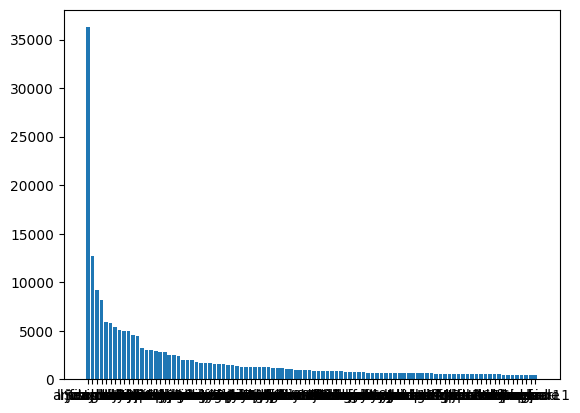

In [4]:
import matplotlib.pyplot as plt

top_followers = new_profile.sort_values(by="followers", axis=0, ascending=False)[:100]

fig = plt.figure()

plt.bar(top_followers.user_name, top_followers.followers)
plt.show()


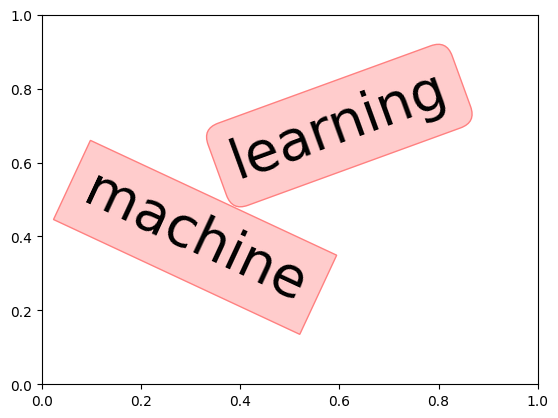

In [5]:
fig = plt.figure()

plt.text(
    0.6,
    0.7,
    "learning",
    size=40,
    rotation=20.0,
    ha="center",
    va="center",
    bbox=dict(
        boxstyle="round",
        ec=(1.0, 0.5, 0.5),
        fc=(1.0, 0.8, 0.8),
    ),
)

plt.text(
    0.55,
    0.6,
    "machine",
    size=40,
    rotation=-25.0,
    ha="right",
    va="top",
    bbox=dict(
        boxstyle="square",
        ec=(1.0, 0.5, 0.5),
        fc=(1.0, 0.8, 0.8),
    ),
)

plt.show()


## Cons

/var/folders/5w/fg65_rp17lz39z89p0nkv8ch0000gn/T/ipykernel_76056/3681204617.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(correlation.columns)
/var/folders/5w/fg65_rp17lz39z89p0nkv8ch0000gn/T/ipykernel_76056/3681204617.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(correlation.columns)


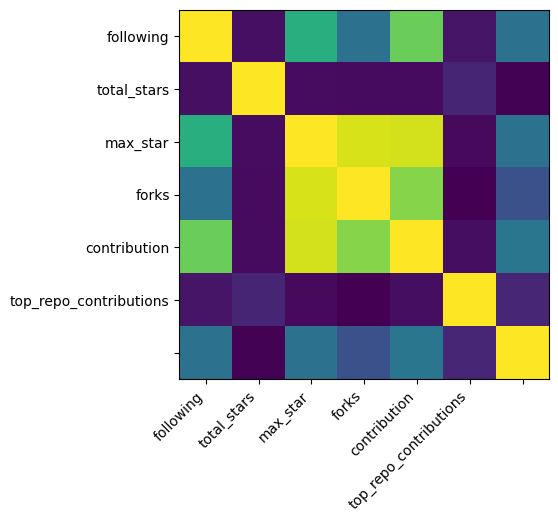

In [20]:
num_features = new_profile.select_dtypes("int64")
correlation = num_features.corr()

fig, ax = plt.subplots()
im = plt.imshow(correlation)

ax.set_xticklabels(correlation.columns)
ax.set_yticklabels(correlation.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()


# Seaborn

## Pros

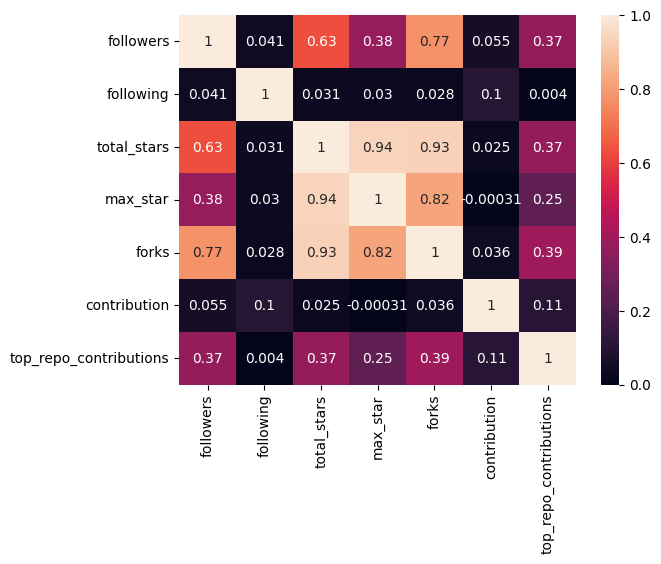

In [22]:
import seaborn as sns

sns.heatmap(correlation, annot=True)
plt.show()


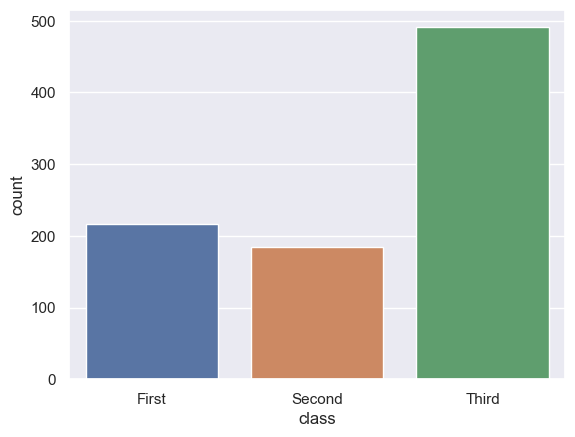

In [23]:
sns.set(style="darkgrid")

titanic = sns.load_dataset("titanic")

ax = sns.countplot(x="class", data=titanic)
plt.show()


# Plotly

In [25]:
import plotly.express as px

fig = px.scatter(
    new_profile[:100],
    x="followers",
    y="total_stars",
    color="forks",
    size="contribution",
)
fig.show()


In [26]:
top_followers = new_profile.sort_values(by="followers", axis=0, ascending=False)[:100]

fig = px.bar(
    top_followers,
    x="user_name",
    y="followers",
)

fig.show()


In [35]:
location_df = pd.read_csv(
    "https://gist.githubusercontent.com/khuyentran1401/ce61bbad3bc636bf2548d70d197a0e3f/raw/ab1b1a832c6f3e01590a16231ba25ca5a3d761f3/location_df.csv",
    index_col=0,
)
location_df.head()


user_name               name type_user   
0    josephmisiti      Joseph Misiti     Owner  \
1            wepe              wepon     Owner   
2         ZuzooVn             Nam Vu     Owner   
3           rasbt  Sebastian Raschka     Owner   
4  lazyprogrammer  LazyProgrammer.me     Owner   

                            html_url   
0    https://github.com/josephmisiti  \
1            https://github.com/wepe   
2         https://github.com/ZuzooVn   
3           https://github.com/rasbt   
4  https://github.com/lazyprogrammer   

                                                 bio         company   
0        Mathematician & Co-founder of Math & Pencil  Math & Pencil   \
1                                                NaN          AntFin   
2  A Vietnamese Software Engineer who is really p...             NaN   
3  Machine Learning researcher & open source cont...      UW-Madison   
4                    https://deeplearningcourses.com             NaN   

                       email  followers  following hireable        location   
0                        NaN       2495        273     True    Brooklyn, NY  \
1           wepon@pku.edu.cn       4508         47      NaN  China Hangzhou   
2          zuzoovn@gmail.com       1192         91     True         Vietnam   
3  mail@sebastianraschka.com      12725         33      NaN     Madison, WI   
4                        NaN       2809          0      NaN             NaN   

                 created_at                updated_at  total_stars  max_star   
0  2010-04-17T21:09:13.000Z  2020-06-18T19:43:56.000Z        46355     45243  \
1  2014-10-10T14:28:18.000Z  2020-06-15T14:01:30.000Z         7120      3811   
2  2012-02-11T16:55:02.000Z  2020-07-05T09:24:19.000Z        23898     23893   
3  2013-10-05T16:06:10.000Z  2020-06-30T19:31:04.000Z        47849     12707   
4  2012-01-03T19:14:42.000Z  2020-06-27T21:40:43.000Z         5369      5193   

   forks  contribution  top_repo_contributions   latitude   longitude  
0  11857             2                     781  40.652601  -73.949721  
1   5091             0                     326  30.248963  120.205234  
2   5644            55                     224  15.926666  107.965086  
3  15633           745                    5910  43.074761  -89.383761  
4   4985             2                      92  46.314475   11.048029

In [36]:
m = px.scatter_geo(
    location_df,
    lat="latitude",
    lon="longitude",
    color="total_stars",
    size="forks",
    hover_data=["user_name", "followers"],
    title="Locations of Top Users",
)

m.show()


# Altair

In [41]:
import seaborn as sns
import altair as alt

titanic = sns.load_dataset("titanic")

alt.Chart(titanic).mark_bar().encode(alt.X("class"), y="count()")


alt.Chart(...)

In [42]:
hireable = (
    alt.Chart(titanic)
    .mark_bar()
    .encode(x="sex:N", y="mean_age:Q")
    .transform_aggregate(mean_age="mean(age)", groupby=["sex"])
)

hireable


alt.Chart(...)

In [43]:
brush = alt.selection(type="interval")

points = (
    alt.Chart(titanic)
    .mark_point()
    .encode(
        x="age:Q",
        y="fare:Q",
        color=alt.condition(brush, "class:N", alt.value("lightgray")),
    )
    .add_selection(brush)
)

bars = (
    alt.Chart(titanic)
    .mark_bar()
    .encode(y="class:N", color="class:N", x="count(class):Q")
    .transform_filter(brush)
)

points & bars


alt.VConcatChart(...)

# Bokeh

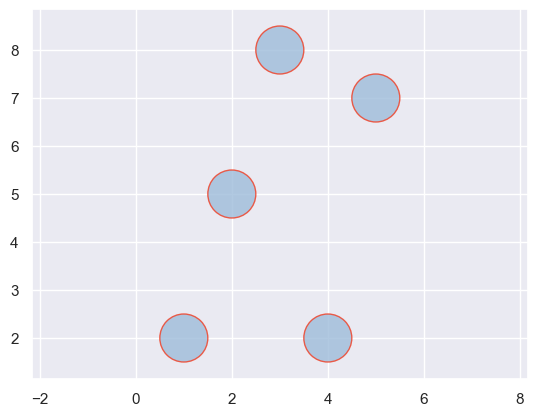

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = [1, 2, 3, 4, 5]
y = [2, 5, 8, 2, 7]

for x, y in zip(x, y):
    ax.add_patch(
        plt.Circle((x, y), 0.5, edgecolor="#f03b20", facecolor="#9ebcda", alpha=0.8)
    )


# Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect("equal", adjustable="datalim")
ax.set_xbound(3, 4)

ax.plot()  # Causes an autoscale update.
plt.show()


In [74]:
from bokeh.io import show, output_notebook
from bokeh.models import Circle
from bokeh.plotting import figure

output_notebook()

plot = figure(tools="tap", title="Select a circle")
renderer = plot.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=50)

selected_circle = Circle(fill_alpha=1, fill_color="firebrick", line_color=None)
nonselected_circle = Circle(fill_alpha=0.2, fill_color="blue", line_color="firebrick")

renderer.selection_glyph = selected_circle
renderer.nonselection_glyph = nonselected_circle

show(plot)


Loading BokehJS ...

In [52]:
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource


source = ColumnDataSource(new_profile)

TOOLS = "box_select,lasso_select,help"
TOOLTIPS = [
    ("user", "@user_name"),
    ("followers", "@followers"),
    ("following", "@following"),
    ("forks", "@forks"),
    ("contribution", "@contribution"),
]

s1 = figure(tooltips=TOOLTIPS, title=None, tools=TOOLS)
s1.circle(x="followers", y="following", source=source)

s2 = figure(tooltips=TOOLTIPS, title=None, tools=TOOLS)
s2.circle(x="followers", y="forks", source=source)

s3 = figure(tooltips=TOOLTIPS, title=None, tools=TOOLS)
s3.circle(x="followers", y="contribution", source=source)

p = gridplot([[s1, s2, s3]])
show(p)


In [61]:
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

titanic_groupby = titanic.groupby("class")["survived"].sum().reset_index()

p = figure(x_range=list(titanic_groupby["class"]))
p.vbar(
    x="class",
    top="survived",
    source=titanic_groupby,
    fill_color=factor_cmap(
        "class", palette=Spectral6, factors=list(titanic_groupby["class"])
    ),
)
show(p)


In [62]:
p = figure(x_range=list(titanic_groupby["class"]))
p.vbar(
    x="class",
    top="survived",
    width=0.9,
    source=titanic_groupby,
    fill_color=factor_cmap(
        "class", palette=Spectral6, factors=list(titanic_groupby["class"])
    ),
)
show(p)


# Folium

In [76]:
import folium

# Save latitudes, longitudes, and locations' names in a list
lats = location_df["latitude"]
lons = location_df["longitude"]
names = location_df["location"]

# Create a map with an initial location
m = folium.Map(location=[lats[0], lons[0]])

for lat, lon, name in zip(lats, lons, names):
    # Create marker with other locations
    folium.Marker(
        location=[lat, lon], popup=name, icon=folium.Icon(color="green")
    ).add_to(m)

m


In [78]:
# Enable adding more locations in the map
m = m.add_child(folium.ClickForMarker(popup="Potential Location"))
m


In [67]:
# heatmap

from folium.plugins import HeatMap

m = folium.Map(location=[lats[0], lons[0]])

HeatMap(data=location_df[["latitude", "longitude", "total_stars"]]).add_to(m)

m
